In [1]:
pwd

'C:\\Users\\user\\UNZIP_FOR_NOTEBOOKS_FINAL\\17-Supervised-Learning-Capstone-Project'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:xlabel='Churn', ylabel='count'>

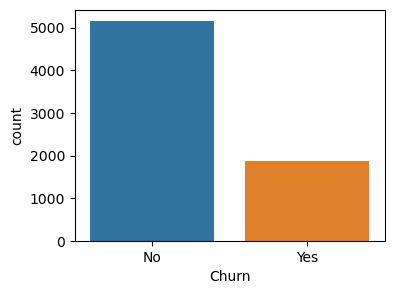

In [10]:

plt.figure(figsize=(4,3))
sns.countplot(df['Churn'])


<Figure size 1500x900 with 0 Axes>

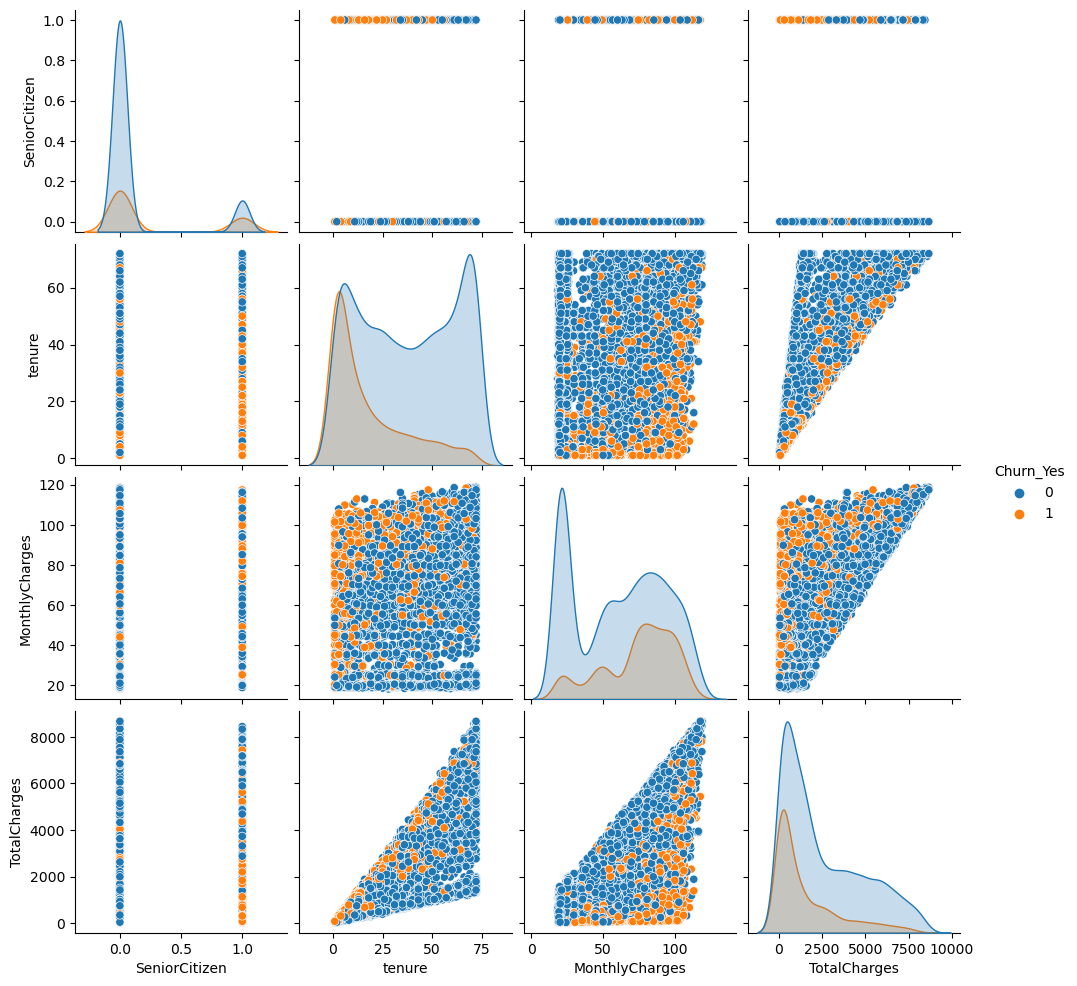

In [11]:
plt.figure(figsize=(10,6),dpi=150,edgecolor='black')
h=pd.get_dummies(df['Churn'],drop_first=True)
pair_df=df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']]
pair_df['Churn_Yes']=pd.get_dummies(pair_df['Churn'],drop_first=True)
pair_df.drop('Churn',axis=1,inplace=True)
sns.pairplot(data=pair_df,diag_kind='kde',hue='Churn_Yes')

<AxesSubplot:>

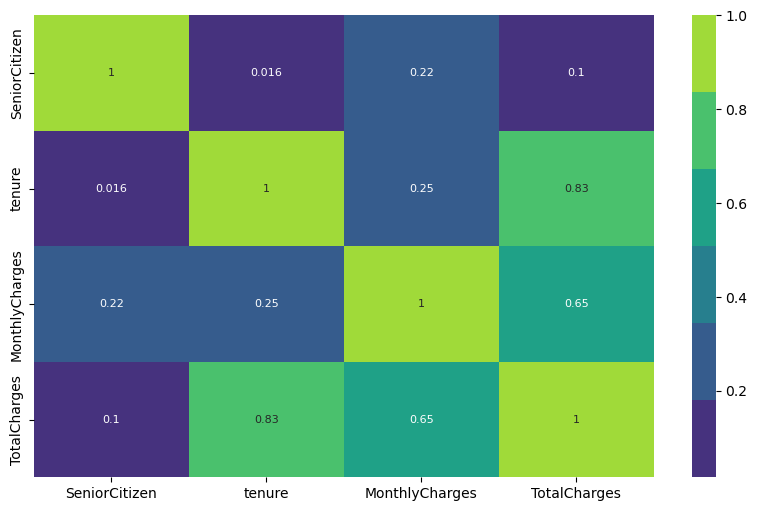

In [12]:
plt.figure(figsize=(10,6))
colormap = sns.color_palette("viridis")
sns.heatmap(data=df.corr(),annot=True,cmap=colormap,fmt='.2g',annot_kws={'size': 8})


In [13]:
# As tenure of compony or monthly charges increased --> People left off the job(Churn_Yes)

In [5]:
# df.drop('Churn_Yes',axis=1,inplace=True)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
df=pd.get_dummies(df.drop('customerID',axis=1),drop_first=True)

In [8]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [4]:
X= df.drop('Churn_Yes',axis=1)

In [5]:
y=df['Churn_Yes']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [7]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,confusion_matrix,mean_absolute_error,mean_squared_error

In [13]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [14]:
log_model = LogisticRegression()

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [18]:
log_model.coef_

array([[ 0.1006023 , -1.30215323, -0.62265736,  0.56004944, -0.01183579,
        -0.01055903, -0.05193657, -0.02131749,  0.02131749,  0.14939649,
         0.67435142, -0.07706138, -0.07706138, -0.13152687, -0.07706138,
        -0.00834346, -0.07706138,  0.01601473, -0.07706138, -0.13634279,
        -0.07706138,  0.24169808, -0.07706138,  0.16779756, -0.30719414,
        -0.63233499,  0.13396449, -0.02894772,  0.13932041, -0.02334429]])

In [19]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [20]:
coefs=coefs.sort_values()

In [21]:
coefs.values

array([-1.30215323, -0.63233499, -0.62265736, -0.30719414, -0.13634279,
       -0.13152687, -0.07706138, -0.07706138, -0.07706138, -0.07706138,
       -0.07706138, -0.07706138, -0.07706138, -0.05193657, -0.02894772,
       -0.02334429, -0.02131749, -0.01183579, -0.01055903, -0.00834346,
        0.01601473,  0.02131749,  0.1006023 ,  0.13396449,  0.13932041,
        0.14939649,  0.16779756,  0.24169808,  0.56004944,  0.67435142])

In [22]:
coefs.index

Index(['tenure', 'Contract_Two year', 'MonthlyCharges', 'Contract_One year',
       'TechSupport_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service',
       'StreamingMovies_No internet service',
       'StreamingTV_No internet service', 'TechSupport_No internet service',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'DeviceProtection_No internet service', 'Dependents_Yes',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'gender_Male', 'Partner_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'MultipleLines_No phone service',
       'SeniorCitizen', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check', 'MultipleLines_Yes',
       'StreamingMovies_Yes', 'StreamingTV_Yes', 'TotalCharges',
       'InternetService_Fiber optic'],
      dtype='object')

Text(0, 0.5, 'Model_coef_')

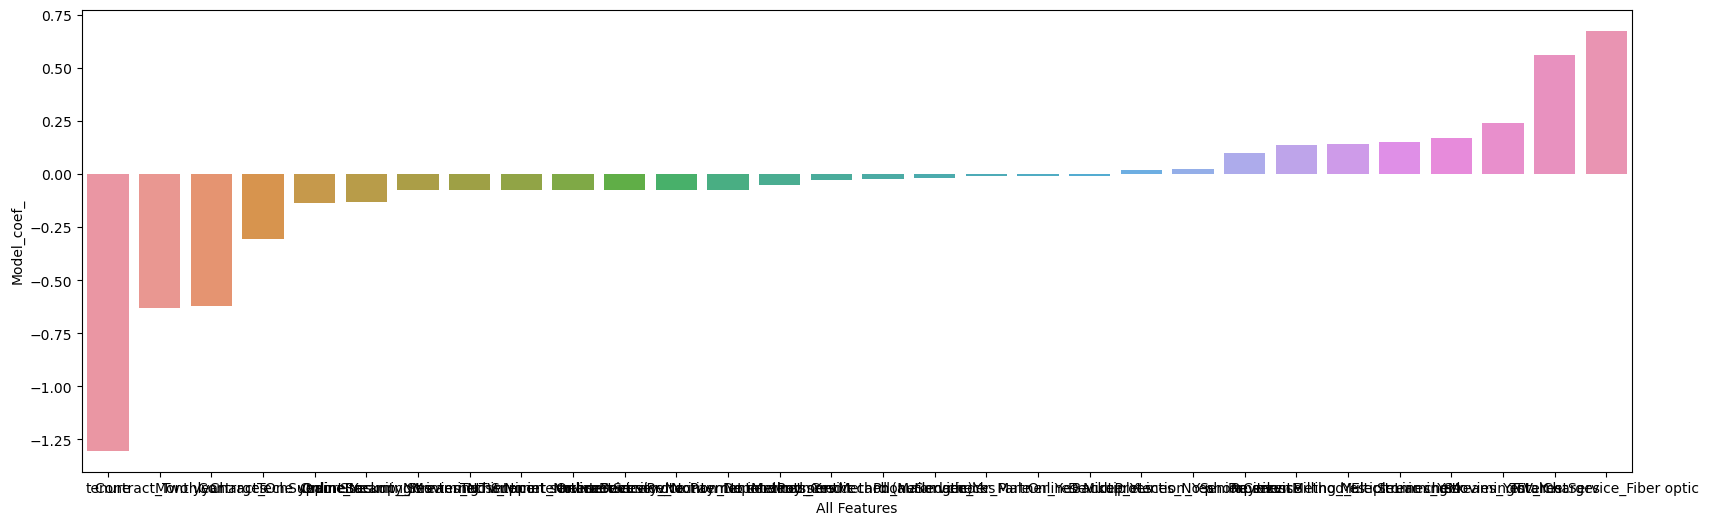

In [38]:
plt.figure(figsize=(20,6))
sns.barplot(x=coefs.index,y=coefs.values);
plt.xlabel('All Features')
plt.ylabel('Model_coef_')

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [25]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.8061611374407583

In [26]:
confusion_matrix(y_test,y_pred)

array([[1413,  167],
       [ 242,  288]], dtype=int64)

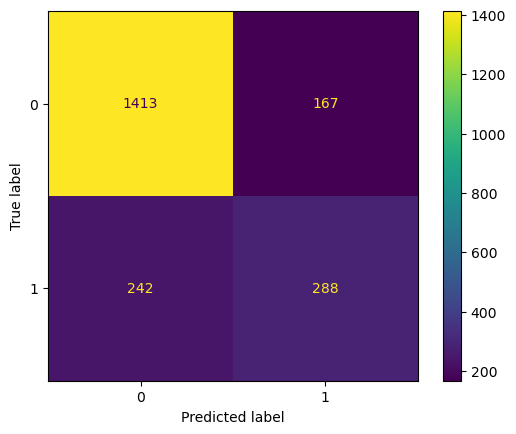

In [27]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.63      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [28]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

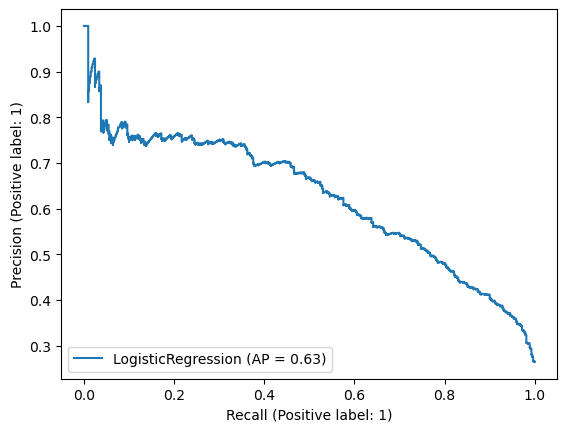

In [30]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test) 
#AS Recall increases(Values founds) --> precision decreases( faulty prediction increases)

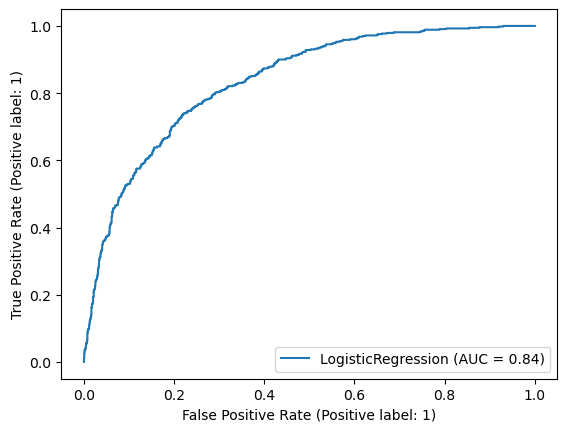

In [31]:
plot_roc_curve(log_model,scaled_X_test,y_test) #Result--> Our model not significantly splitted true positives and true negatives or --> False prediction increases

In [32]:
X_test.iloc[500]

SeniorCitizen                             0.00
tenure                                    2.00
MonthlyCharges                           20.45
TotalCharges                             34.80
gender_Male                               0.00
Partner_Yes                               0.00
Dependents_Yes                            0.00
PhoneService_Yes                          1.00
MultipleLines_No phone service            0.00
MultipleLines_Yes                         0.00
InternetService_Fiber optic               0.00
InternetService_No                        1.00
OnlineSecurity_No internet service        1.00
OnlineSecurity_Yes                        0.00
OnlineBackup_No internet service          1.00
OnlineBackup_Yes                          0.00
DeviceProtection_No internet service      1.00
DeviceProtection_Yes                      0.00
TechSupport_No internet service           1.00
TechSupport_Yes                           0.00
StreamingTV_No internet service           1.00
StreamingTV_Y

In [42]:
y_test.iloc[500]

0

In [43]:
demo=X_test.iloc[500].to_list()
demo=[demo]
demo

[[0.0,
  2.0,
  20.45,
  34.8,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0]]

In [44]:
log_model.predict(demo) #False Prediction

array([1], dtype=uint8)

In [45]:
log_model.predict_proba(demo)

array([[0.1733154, 0.8266846]])

In [ ]:
# *****************************************************************************************
# *****************************************************************************************
# *****************************************************************************************

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn_model = KNeighborsClassifier(n_neighbors=10)

In [48]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [49]:
y_pred = knn_model.predict(scaled_X_test)

In [50]:
accuracy_score(y_test,y_pred)

0.7834123222748816

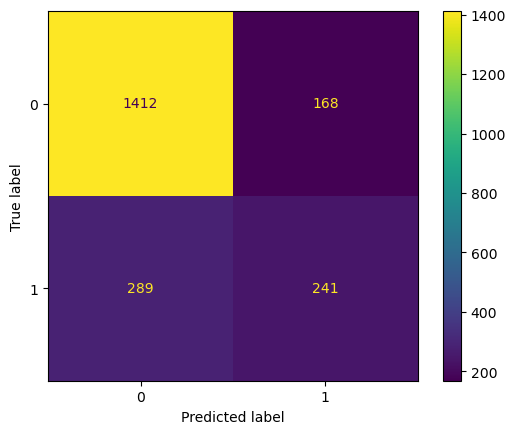

In [51]:
plot_confusion_matrix(knn_model,scaled_X_test,y_test)

In [52]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

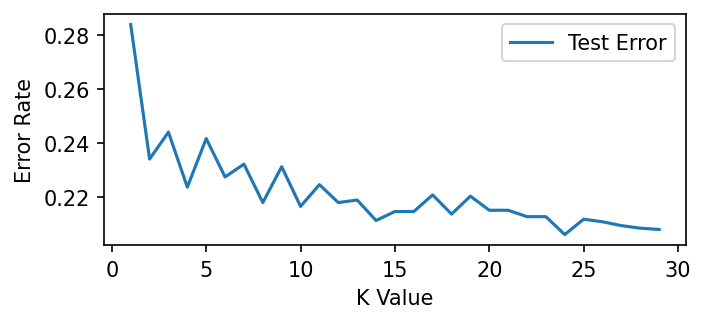

In [53]:
plt.figure(figsize=(5,2),dpi=150)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [51]:
#Pipeline for finding best k-value

In [54]:
scaler = StandardScaler()

In [55]:
knn = KNeighborsClassifier()

In [56]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [57]:
operations = [('scaler',scaler),('knn',knn)]

In [58]:
from sklearn.pipeline import Pipeline

In [59]:
pipe = Pipeline(operations)

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [62]:
param_grid = {'knn__n_neighbors': k_values}

In [63]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [64]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [65]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 14,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [66]:
scaler = StandardScaler()
knn19 = KNeighborsClassifier(n_neighbors=19)
operations = [('scaler',scaler),('knn19',knn19)]

In [67]:
pipe = Pipeline(operations)

In [68]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn19', KNeighborsClassifier(n_neighbors=19))])

In [69]:
pipe_pred = pipe.predict(X_test)

In [70]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1580
           1       0.57      0.53      0.55       530

    accuracy                           0.78      2110
   macro avg       0.71      0.70      0.70      2110
weighted avg       0.77      0.78      0.78      2110



In [71]:
demo2 = X_test.iloc[500]

demo2

SeniorCitizen                             0.00
tenure                                    2.00
MonthlyCharges                           20.45
TotalCharges                             34.80
gender_Male                               0.00
Partner_Yes                               0.00
Dependents_Yes                            0.00
PhoneService_Yes                          1.00
MultipleLines_No phone service            0.00
MultipleLines_Yes                         0.00
InternetService_Fiber optic               0.00
InternetService_No                        1.00
OnlineSecurity_No internet service        1.00
OnlineSecurity_Yes                        0.00
OnlineBackup_No internet service          1.00
OnlineBackup_Yes                          0.00
DeviceProtection_No internet service      1.00
DeviceProtection_Yes                      0.00
TechSupport_No internet service           1.00
TechSupport_Yes                           0.00
StreamingTV_No internet service           1.00
StreamingTV_Y

In [72]:
pipe.predict(demo2.values.reshape(1, -1))

array([0], dtype=uint8)

In [73]:
pipe.predict_proba(demo2.values.reshape(1, -1))

array([[1., 0.]])

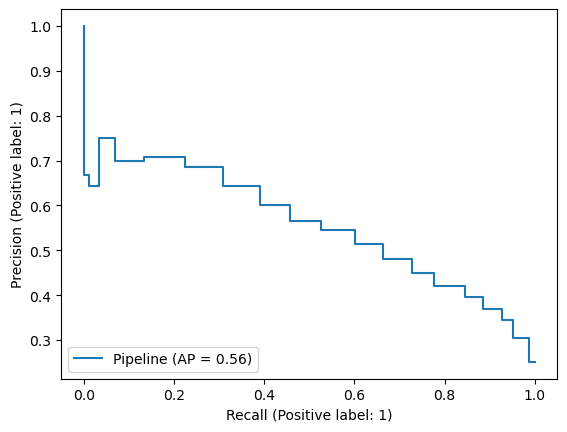

In [74]:
plot_precision_recall_curve(pipe,X_test,y_test)   

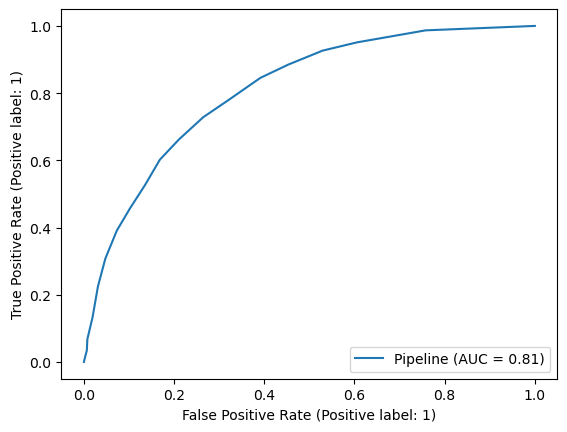

In [75]:
plot_roc_curve(pipe,X_test,y_test) 


In [140]:
# **********************************************************************************************
# **********************************************************************************************
# ***********************************************************************************************

In [11]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')

In [81]:

param_grid={
    'C':[0.01,0.3,0.5,1.0,2.0,5.0,10.0,15.0],
    
    'gamma' : ['scale', 'auto'],
    
    'kernel' : ['linear', 'poly', 'rbf'],
    
}


In [10]:
from sklearn.model_selection import GridSearchCV

In [82]:
#cv_model=GridSearchCV(model,param_grid=param_grid,cv=5) #pc agni
grid=GridSearchCV(svc,param_grid=param_grid)
grid


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.01, 0.3, 0.5, 1.0, 2.0, 5.0, 10.0, 15.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
# grid.fit(scaled_X_train,y_train)
grid.fit(X,y)

In [84]:
grid.best_score_

0.7501070942181504

In [85]:
grid.best_params_

{'C': 2.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [15]:
svc2=SVC(C=2.0)
svc2.fit(scaled_X_train,y_train)
pred2=svc2.predict(scaled_X_test)
accuracy_score(y_test,pred2)

0.8061611374407583

In [16]:
confusion_matrix(y_test,pred2)

array([[1433,  147],
       [ 262,  268]], dtype=int64)

In [17]:
svc = SVC()

In [18]:
svc.fit(scaled_X_train,y_train)

SVC()

In [19]:
pred=svc.predict(scaled_X_test)

In [20]:
accuracy_score(y_test,pred)

0.8080568720379147

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1580
           1       0.66      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110



In [24]:
confusion_matrix(y_test,pred)

array([[1441,  139],
       [ 266,  264]], dtype=int64)

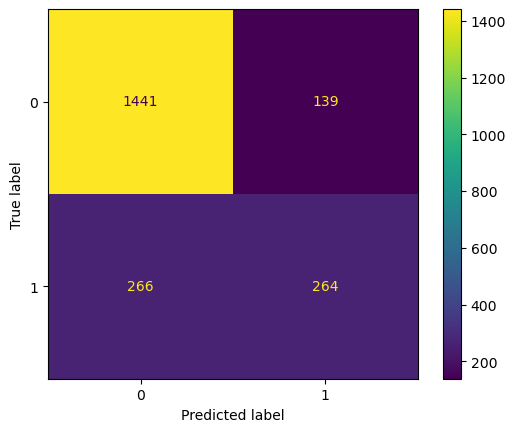

In [26]:
plot_confusion_matrix(svc,scaled_X_test,y_test)

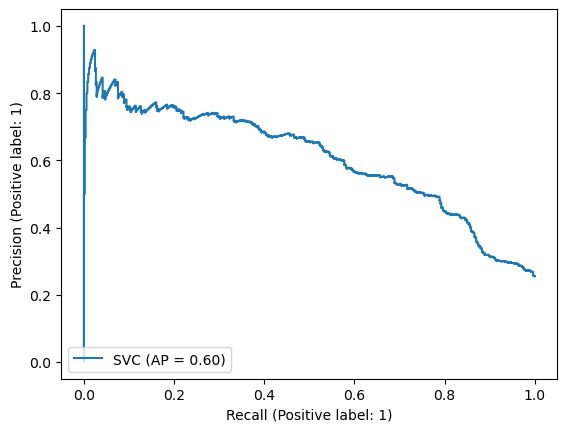

In [29]:
plot_precision_recall_curve(svc,scaled_X_test,y_test)   
#In svc after a threshold(~0.9) prediction value deceases singificantly 
#-->maybe svc overfits(we have to try diffrent c values(lower)
# or lower gamma values)

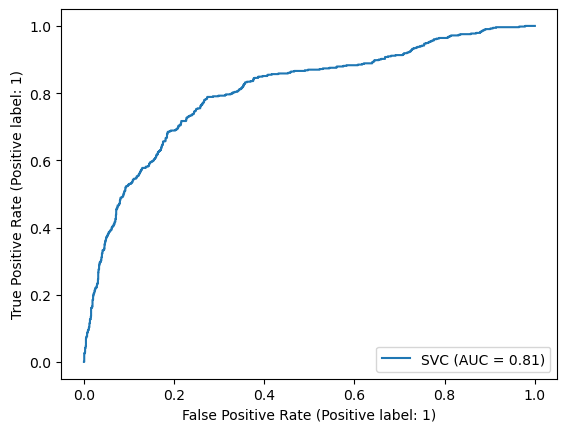

In [30]:
plot_roc_curve(svc,scaled_X_test,y_test) 


In [34]:
svc3=SVC(C=10)

In [35]:
svc3.fit(scaled_X_train,y_train)

SVC(C=10)

In [36]:
pred3=svc3.predict(scaled_X_test)

In [37]:
accuracy_score(y_test,pred3)

0.7848341232227488

In [38]:
confusion_matrix(y_test,pred3)

array([[1390,  190],
       [ 264,  266]], dtype=int64)

In [39]:
svc4=SVC(C=15)

In [44]:
svc4.fit(scaled_X_train,y_train)

SVC(C=15)

In [45]:
pred4=svc4.predict(scaled_X_test)

In [46]:
accuracy_score(y_test,pred4)

0.7786729857819905

In [47]:
confusion_matrix(y_test,pred4)

array([[1375,  205],
       [ 262,  268]], dtype=int64)

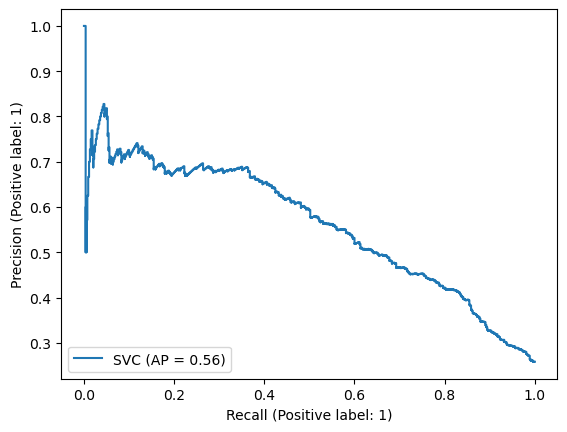

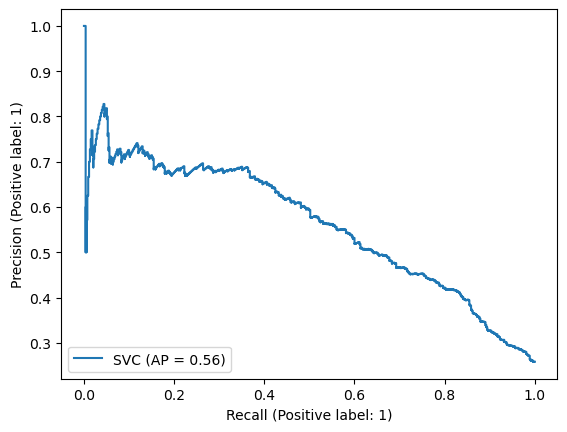

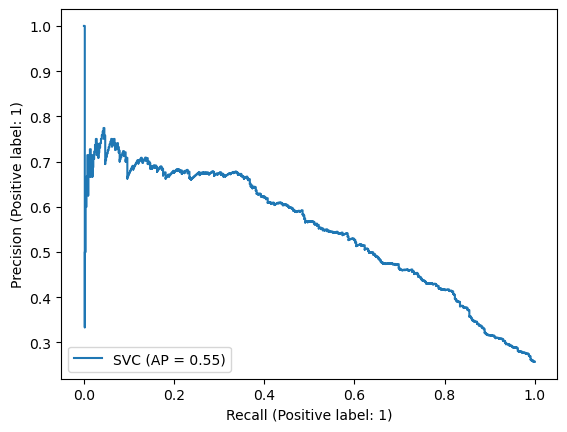

In [48]:
a=plot_precision_recall_curve(svc2,scaled_X_test,y_test)   
b=plot_precision_recall_curve(svc3,scaled_X_test,y_test)
c=plot_precision_recall_curve(svc4,scaled_X_test,y_test)   

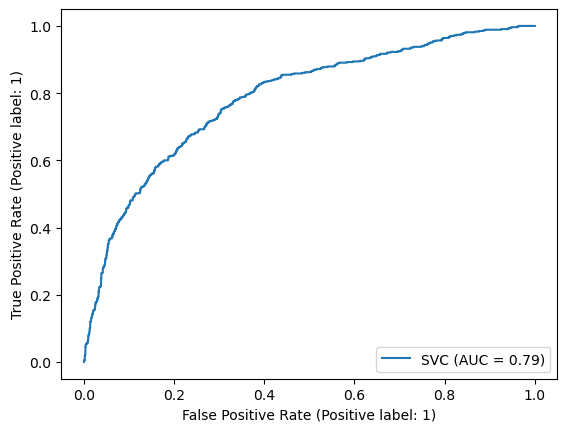

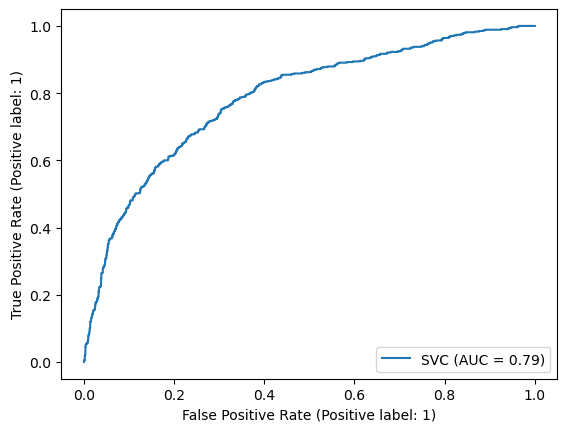

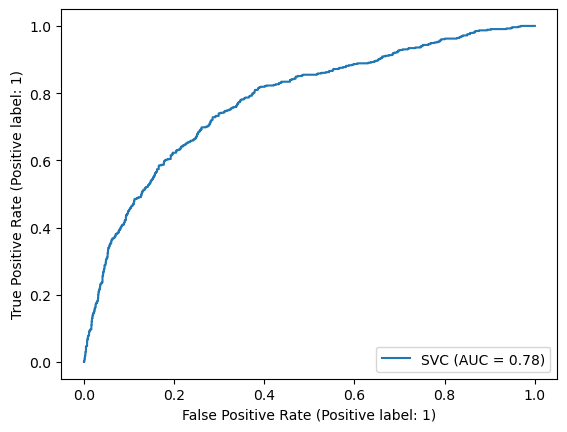

In [49]:
print(plot_roc_curve(svc2,scaled_X_test,y_test))
print(plot_roc_curve(svc3,scaled_X_test,y_test))
print(plot_roc_curve(svc4,scaled_X_test,y_test))

In [ ]:
# **********************************************************************************************
# **********************************************************************************************
# **********************************************************************************************

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
model = RandomForestClassifier(n_estimators=100,max_features='auto',random_state=101) #can use GridSearchCV for different hyperparameters

In [194]:
model.fit(X_train,y_train)          #Not scaling reuired in trees

RandomForestClassifier(random_state=101)

In [195]:
preds = model.predict(X_test)

In [196]:
print(accuracy_score(y_test,preds))

0.8071090047393364


In [197]:
confusion_matrix(y_test,preds)

array([[1458,  122],
       [ 285,  245]], dtype=int64)

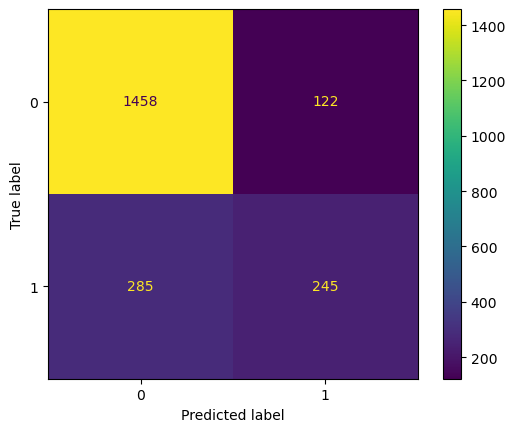

In [190]:
plot_confusion_matrix(model,X_test,y_test)

In [162]:
model.feature_importances_

array([0.01353815, 0.10377925, 0.08160641, ..., 0.01020549, 0.0266963 ,
       0.00872141])

In [220]:
test_error = []

for n in range(1,100):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

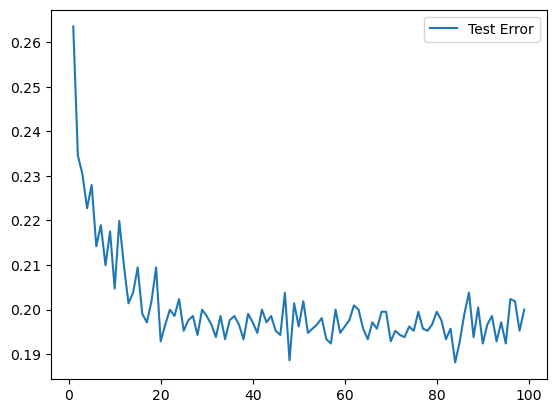

In [221]:
plt.plot(range(1,100),test_error,label='Test Error')
plt.legend()

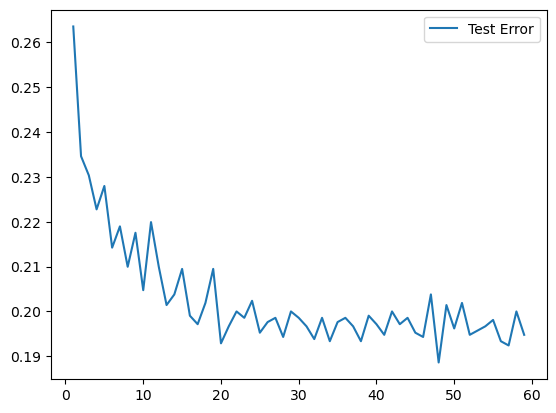

In [226]:
plt.plot(range(1,60),test_error[:59],label='Test Error')
plt.legend()

In [ ]:
'''
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!
             
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

grid.best_params_
predictions = grid.predict(X_test)
print(classification_report(y_test,predictions))


'''  #Lappy Dead

In [217]:
model2 = RandomForestClassifier(n_estimators=25,random_state=101,class_weight="balanced")
model2.fit(X_train,y_train)
preds2 = model2.predict(X_test)
print(accuracy_score(y_test,preds2)) 

0.7990521327014218


In [219]:
model3 = RandomForestClassifier(n_estimators=50,random_state=101,class_weight="balanced")
model3.fit(X_train,y_train)
preds3 = model3.predict(X_test)
print(accuracy_score(y_test,preds3))

0.8023696682464455


In [227]:
# ***********************************************************************************************
# ***********************************************************************************************
# ***********************************************************************************************

In [164]:
from sklearn.ensemble import AdaBoostClassifier

In [181]:
model = AdaBoostClassifier(n_estimators=50)

In [182]:
model.fit(X_train,y_train)

AdaBoostClassifier()

In [183]:
predictions = model.predict(X_test)

In [184]:
accuracy_score(y_test,predictions)

0.8099526066350711

In [185]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1580
           1       0.64      0.54      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [186]:
model.feature_importances_.argmax()

1

In [187]:
X.columns[1]

'tenure'

In [188]:
model.feature_importances_

array([0.02, 0.16, 0.04, ..., 0.  , 0.02, 0.  ])

In [189]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [190]:
feats

,Importance
SeniorCitizen,0.02
tenure,0.16
MonthlyCharges,0.04
TotalCharges,0.10
customerID_0003-MKNFE,0.00
...,...
Contract_Two year,0.04
PaperlessBilling_Yes,0.02
PaymentMethod_Credit card (automatic),0.00
PaymentMethod_Electronic check,0.02


In [195]:
imp_feats = feats[feats['Importance']>0.01]

In [196]:
imp_feats

,Importance
SeniorCitizen,0.02
tenure,0.16
MonthlyCharges,0.04
TotalCharges,0.10
customerID_0203-HHYIJ,0.02
customerID_0516-VRYBW,0.02
customerID_0607-DAAHE,0.02
customerID_0628-CNQRM,0.02
customerID_0687-ZVTHB,0.02
customerID_1043-YCUTE,0.02


In [197]:
imp_feats = imp_feats.sort_values("Importance")

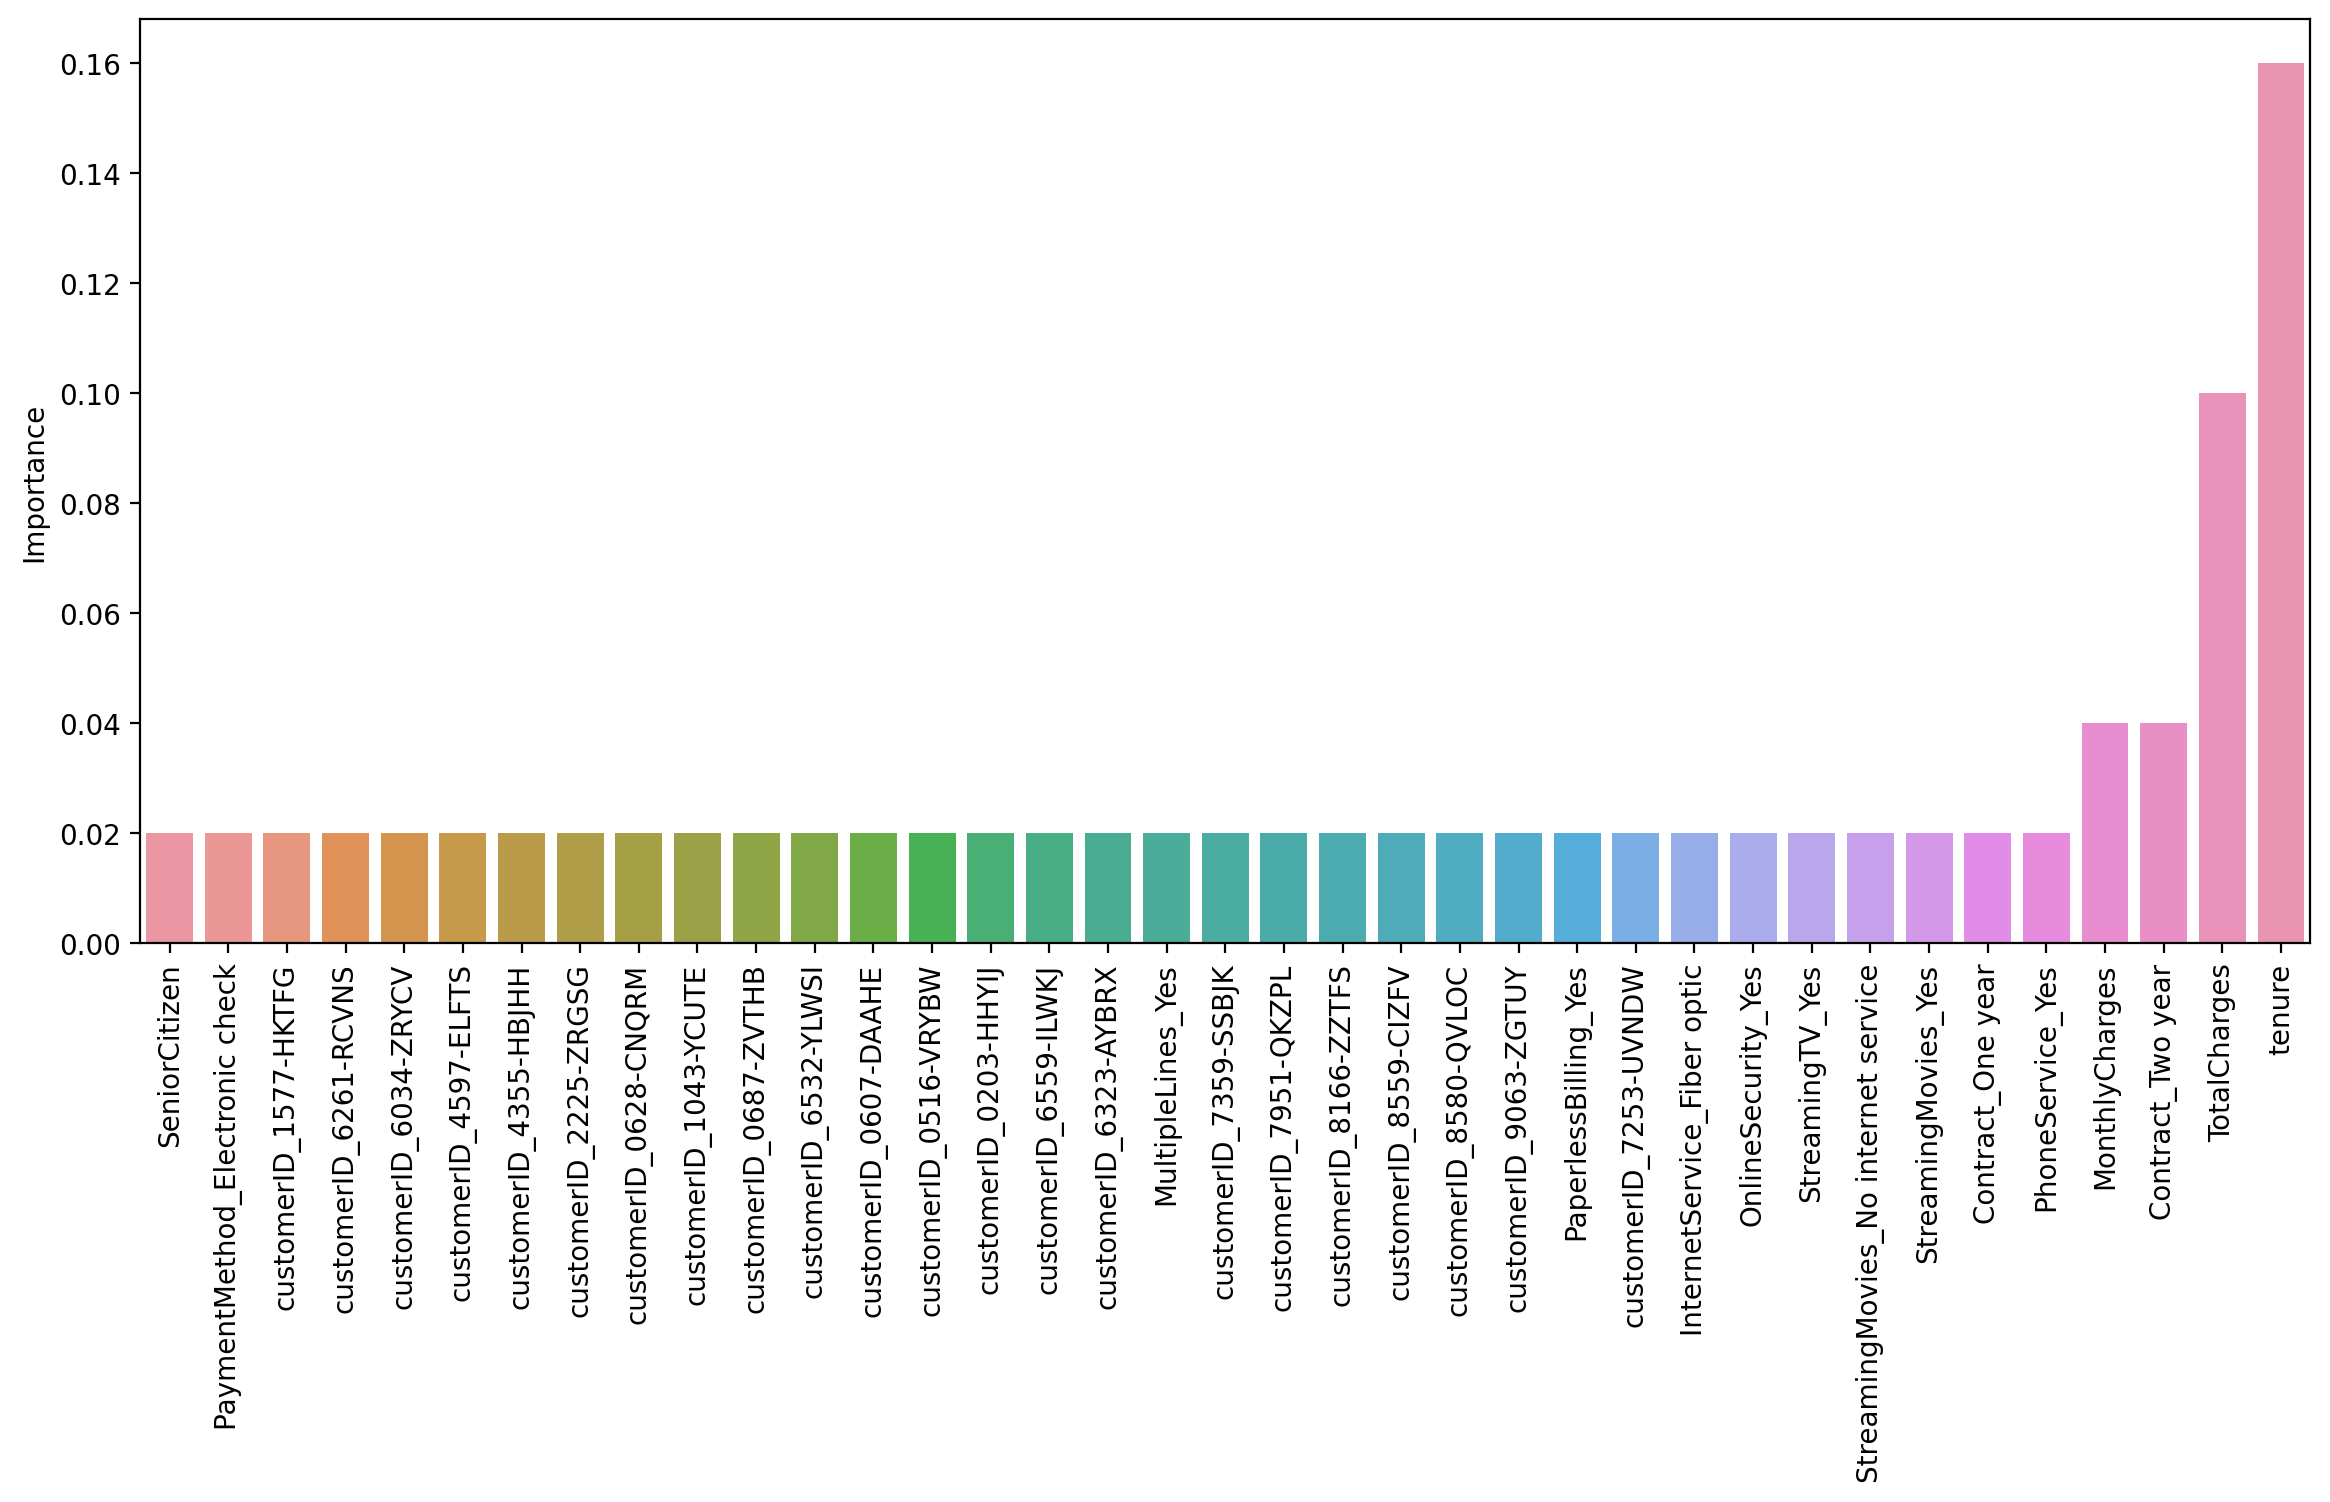

In [198]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

In [228]:
from sklearn.ensemble import AdaBoostClassifier
model2 = AdaBoostClassifier(n_estimators=100)
model2.fit(X_train,y_train)
predictions2 = model2.predict(X_test)
accuracy_score(y_test,predictions2)

0.8090047393364929

In [229]:
model3 = AdaBoostClassifier(n_estimators=100,learning_rate=2.0)
model3.fit(X_train,y_train)
predictions3 = model3.predict(X_test)
accuracy_score(y_test,predictions3)

0.6601895734597156

In [230]:
model4 = AdaBoostClassifier(n_estimators=100,learning_rate=0.5)
model4.fit(X_train,y_train)
predictions4 = model4.predict(X_test)
accuracy_score(y_test,predictions4)

0.8075829383886256

In [231]:
model5 = AdaBoostClassifier(n_estimators=100,learning_rate=0.2)
model5.fit(X_train,y_train)
predictions5 = model5.predict(X_test)
accuracy_score(y_test,predictions5)

0.8090047393364929

In [232]:
model6 = AdaBoostClassifier(n_estimators=100,learning_rate=0.01)
model6.fit(X_train,y_train)
predictions6 = model6.predict(X_test)
accuracy_score(y_test,predictions6)

0.7488151658767772

In [234]:
# ***************************************************************************************************
# ***************************************************************************************************
# ***************************************************************************************************

In [233]:
from sklearn.ensemble import GradientBoostingClassifier

In [200]:
gb_model = GradientBoostingClassifier(n_estimators=100,max_depth=3)

In [202]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [203]:
predictions = gb_model.predict(X_test)

In [204]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1580
           1       0.65      0.49      0.56       530

    accuracy                           0.81      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.80      0.81      0.80      2110



In [205]:
gb_model.feature_importances_

array([0.01075847, 0.31620116, 0.02424281, ..., 0.00190067, 0.10085363,
       0.        ])

In [207]:
feat_import=gb_model.feature_importances_
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [208]:
imp_feats

,Importance
SeniorCitizen,0.010758
tenure,0.316201
MonthlyCharges,0.024243
TotalCharges,0.025961
customerID_0003-MKNFE,0.000000
...,...
Contract_Two year,0.078367
PaperlessBilling_Yes,0.016426
PaymentMethod_Credit card (automatic),0.001901
PaymentMethod_Electronic check,0.100854


In [209]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
tenure,0.316201
InternetService_Fiber optic,0.198506
PaymentMethod_Electronic check,0.100854
Contract_Two year,0.078367
Contract_One year,0.060626
...,...
customerID_3415-TAILE,0.000000
customerID_3413-DHLPB,0.000000
customerID_3413-CSSTH,0.000000
customerID_3413-BMNZE,0.000000


In [210]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,7061.0,0.000142,0.004785,0.0,0.0,0.0,0.0,0.316201


In [214]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.001]

In [215]:
imp_feats

,Importance
SeniorCitizen,0.010758
tenure,0.316201
MonthlyCharges,0.024243
TotalCharges,0.025961
customerID_0607-DAAHE,0.001309
customerID_1043-YCUTE,0.001299
customerID_6323-AYBRX,0.001298
customerID_7253-UVNDW,0.001289
customerID_7951-QKZPL,0.001310
gender_Male,0.001990


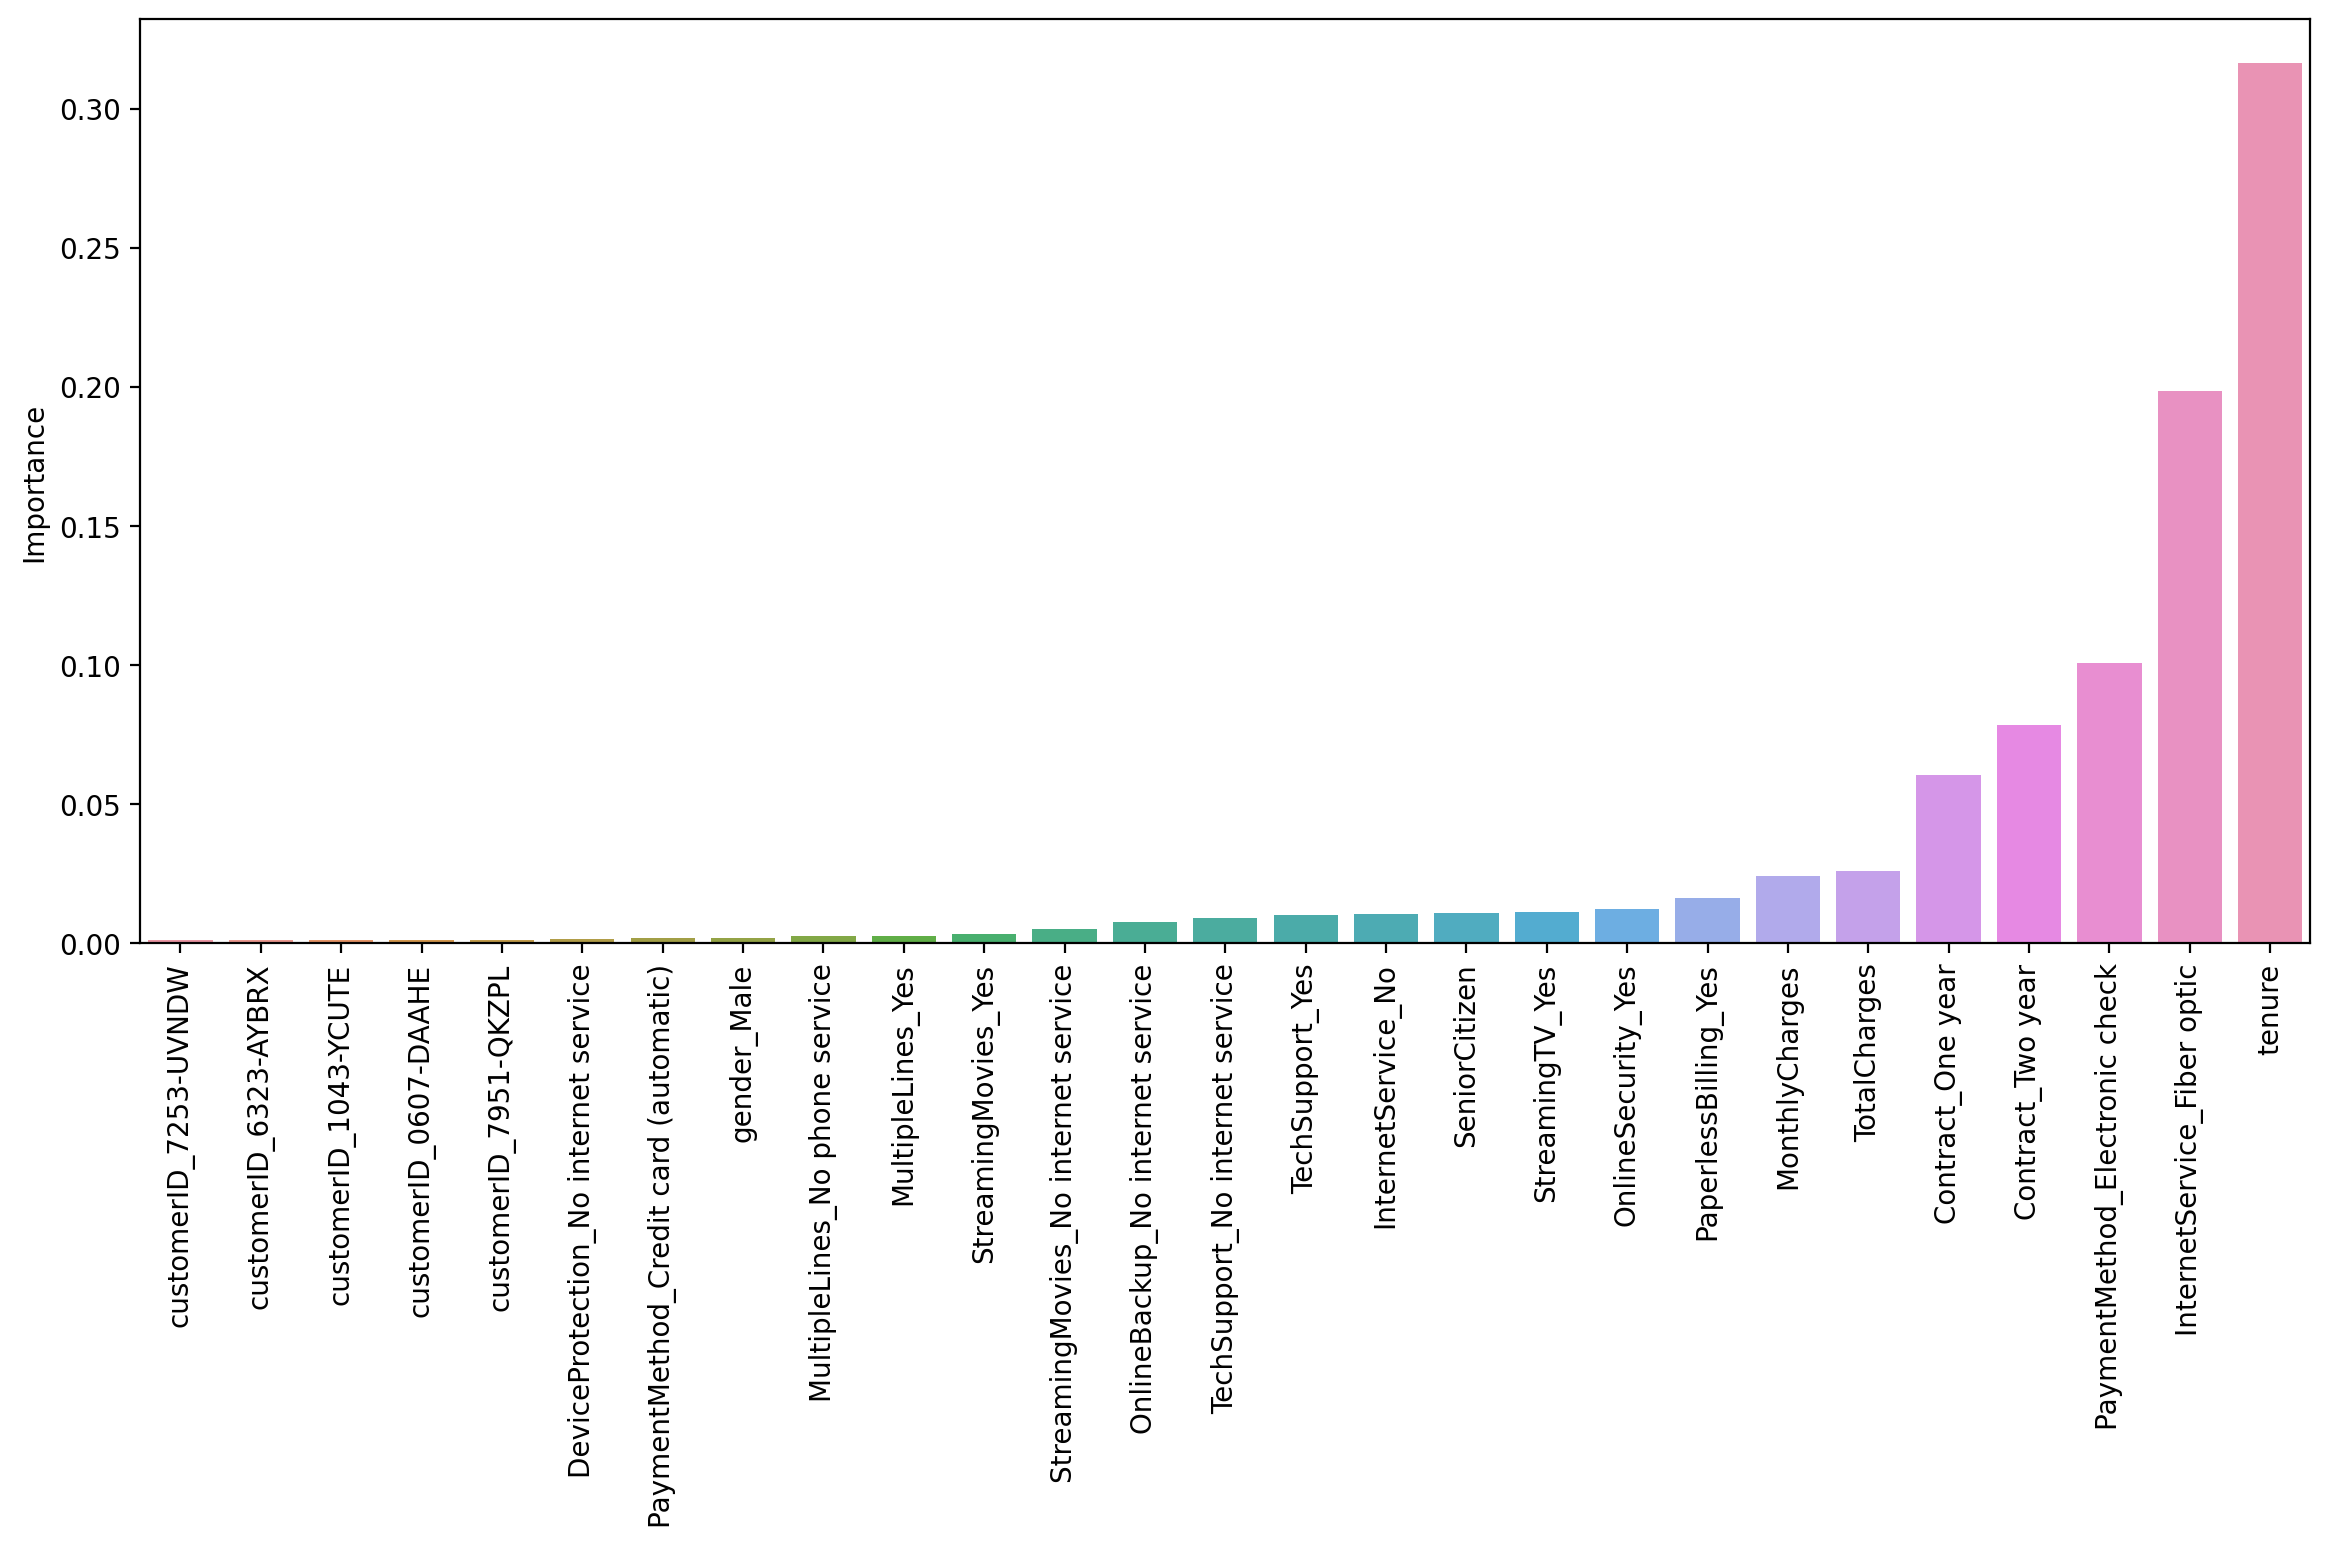

In [216]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [ ]:
# As seen ---> Tenure, total charges , Contract, internet service, payment methods plays very important role for Churning